# Cost Function

- A cost function is an important parameter that determines how well the machine learning algorithms or models performs for a given dataset.

- cost function is a measure of how wrong the model is estimating the relationship between X and Y paramters.

##### Types of Cost Function:

1. Regression Cost Function
2. Classification Cost Function

##### 1. Regression cost function

Regression models are used to make a prediction for the continuous variables. 

- MSE (Mean Squared Error)
- RMSE (Root mean Squared Error)
- MAE (Mean Absolute Error)
- R^2 Accuracy

##### 2. Binary classification Cost Functions:

classification models are used to make predictions of categorical variables, such as predictions for 0 or 1, Cat or Dog, etc.

###### 3. Multi-class classification Cost Functions:

A multi-class classification cost function is used in the classification problems for which instances are allocated to one or more than two classes.

- Binary Cross Entropy Cost Function or Log Loss Function


# Regression Cost Function

# Regularization Technique

- This is a forrm of regularization, that contrains / regularizes or shrinks the coefficient estimates towards zero.

- This technique discourages learning a more complex or flexible model, so as to aviod the risk of overfitting.

##### Regularization can achieve this motive with 2 techniques:

- Lasso Regularization / L1
- Ridge Regularization / L2

# 1. Lasso Regularization (L1):

- This is a regularization technique used in feature selection using a shrinkage method also referred to as the penalized regression method.

- Lasso Regression magnitude of coefficients can be exactly zero.

                                        cost fuction  = Loss + lambda * sum || w ||

                                        - Loss = sum of squared residual
                                        - lambda = penalty
                                        - w = slope of the curve
# 2. Ridge Regularization (L2):

- Ridge Regression, also known as L2 regularization, is an extension to linear Regression that introduces a regularization term to reduce model complexity and help prevent overfitting.

- Ridge Regression is working value / magni8tude of coefficients is almost eqaul to zero.

                                        cost fuction  = Loss + lambda * sum || w ||^2

                                        - Loss = sum of squared residual
                                        - lambda = penalty
                                        - w = slope of the curve

 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
house = pd.read_csv(r"/workspaces/Data_Science_Notes/machine_learning/supervised_learning_in_ml/data/Housing.csv")

In [3]:
house.head(5)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price,Unnamed: 13
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13300000,NaN
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12250000,NaN
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12250000,NaN
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12215000,NaN
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11410000,NaN


In [4]:
house = house.drop(columns = "Unnamed: 13")

In [5]:
house.head(5)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13300000
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12250000
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12250000
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12215000
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11410000


In [6]:
house = house.rename(columns= {"mainroad" :  "mainroad_yes", "guestroom" : "guestroom_yes", "basement" : "basement_yes", "hotwaterheating" : "hotwaterheating_yes", "airconditioning" : "airconditioning_yes",  "prefarea" : "prefarea_yes"})
house.head(5)

,area,bedrooms,bathrooms,stories,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,parking,prefarea_yes,furnishingstatus,price
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13300000
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12250000
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12250000
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12215000
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11410000


In [7]:
from sklearn.preprocessing import OneHotEncoder

In [8]:
en_data = house[["mainroad_yes", "guestroom_yes", "basement_yes", "hotwaterheating_yes", "airconditioning_yes", "prefarea_yes"]]
ohe = OneHotEncoder(drop= "first")
house[["mainroad_yes", "guestroom_yes", "basement_yes", "hotwaterheating_yes", "airconditioning_yes", "prefarea_yes"]] = ohe.fit_transform(en_data).toarray()
house.head(5)

,area,bedrooms,bathrooms,stories,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,parking,prefarea_yes,furnishingstatus,price
0,7420,4,2,3,1.0,0.0,0.0,0.0,1.0,2,1.0,furnished,13300000
1,8960,4,4,4,1.0,0.0,0.0,0.0,1.0,3,0.0,furnished,12250000
2,9960,3,2,2,1.0,0.0,1.0,0.0,0.0,2,1.0,semi-furnished,12250000
3,7500,4,2,2,1.0,0.0,1.0,0.0,1.0,3,1.0,furnished,12215000
4,7420,4,1,2,1.0,1.0,1.0,0.0,1.0,2,0.0,furnished,11410000


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()
house["furnishingstatus"] = le.fit_transform(house["furnishingstatus"])

house.head(15)

,area,bedrooms,bathrooms,stories,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,parking,prefarea_yes,furnishingstatus,price
0,7420,4,2,3,1.0,0.0,0.0,0.0,1.0,2,1.0,0,13300000
1,8960,4,4,4,1.0,0.0,0.0,0.0,1.0,3,0.0,0,12250000
2,9960,3,2,2,1.0,0.0,1.0,0.0,0.0,2,1.0,1,12250000
3,7500,4,2,2,1.0,0.0,1.0,0.0,1.0,3,1.0,0,12215000
4,7420,4,1,2,1.0,1.0,1.0,0.0,1.0,2,0.0,0,11410000
5,7500,3,3,1,1.0,0.0,1.0,0.0,1.0,2,1.0,1,10850000
6,8580,4,3,4,1.0,0.0,0.0,0.0,1.0,2,1.0,1,10150000
7,16200,5,3,2,1.0,0.0,0.0,0.0,0.0,0,0.0,2,10150000
8,8100,4,1,2,1.0,1.0,1.0,0.0,1.0,2,1.0,0,9870000
9,5750,3,2,4,1.0,1.0,0.0,0.0,1.0,1,1.0,2,9800000


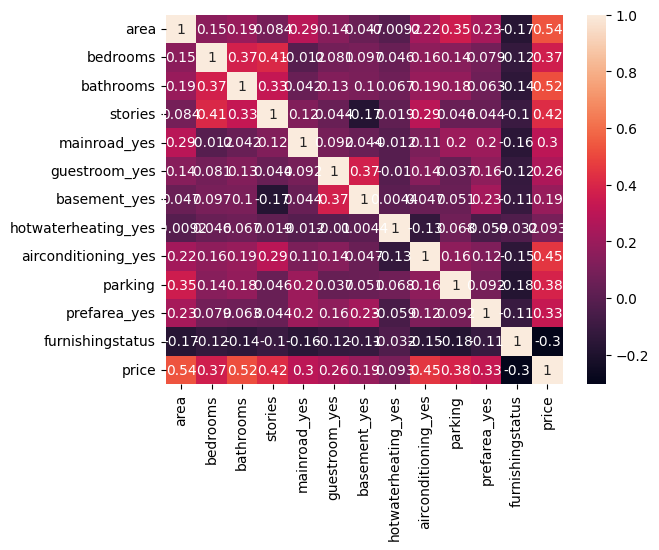

In [26]:
plt.Figure(figsize= (200, 50))
sns.heatmap(data = house.corr(), annot = True)
plt.show()

In [27]:
x = house.iloc[:,:-1]
y = house["price"]

In [28]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x), columns = x.columns)

In [29]:
x_train, X_test,y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [30]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [31]:
lr = LinearRegression()
lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [33]:
lr.score(X_test, y_test)*100

66.14628548582814

In [34]:
lr.coef_

array([ 520022.98285557,   53248.68254328,  565055.44825915,
        334449.73180286,  129517.26169348,  104074.71330067,
        191559.48867826,  144811.93337608,  356313.72677031,
        223365.30844427,  266144.47805509, -157510.27894053])

<BarContainer object of 12 artists>

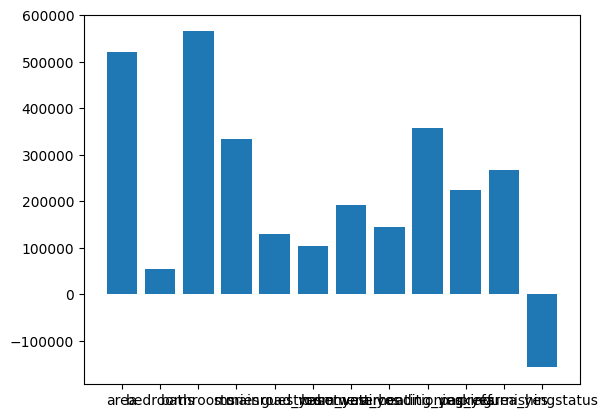

In [42]:
plt.Figure(figsize= (100, 100))
plt.bar(x.columns, lr.coef_)

In [ ]:
la = Lasso(alpha = 0.7)
la.fit(x_train, y_train)
la.score(X_test, y_test)

0.6614626920001927

In [46]:
re = Ridge(alpha = 0.5)
re.fit(x_train, y_train)
re.score(X_test, y_test)

0.6614409874002203